In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

### Baca gambar

In [2]:
img = cv2.imread('foto_diri_kompresi.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Kompres JPEG kualitas rendah (10%)

In [3]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 10]
_, buffer = cv2.imencode(".jpg", img, encode_param)
img_jpeg = cv2.imdecode(buffer, 1)

### Fungsi kuantisasi warna ke 4 level (0, 64, 128, 192)


In [4]:
def quantize(img):
    return (img // 64) * 64

img_quant = quantize(img_rgb)

### Fungsi hitung ukuran gambar (KB)


In [5]:
def get_size(img_array):
    pil_img = Image.fromarray(img_array)
    buffer = io.BytesIO()
    pil_img.save(buffer, format="PNG")
    return len(buffer.getvalue()) / 1024 

### Tampilkan hasil

In [6]:
images = [img_rgb, cv2.cvtColor(img_jpeg, cv2.COLOR_BGR2RGB), img_quant]
titles = [
    f"Asli ({get_size(img_rgb):.2f} KB)",
    f"JPEG 10% ({get_size(img_jpeg):.2f} KB)",
    f"RGB 4 Level ({get_size(img_quant):.2f} KB)"
]

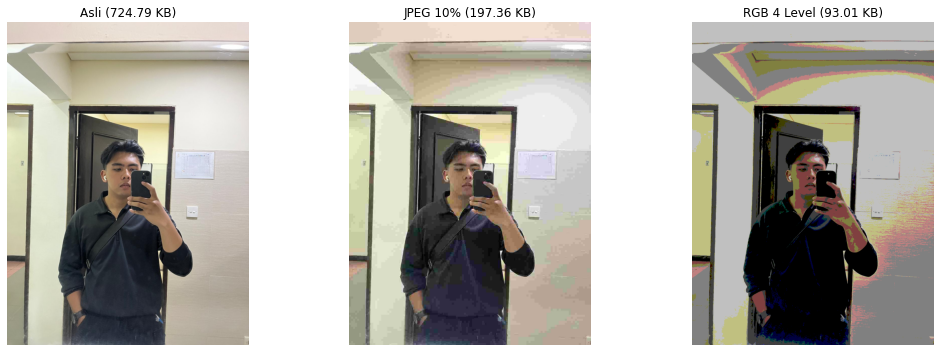

In [7]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()